In [205]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [206]:
path_ = '/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30'
onlyfiles = [os.path.join(path_, f) for f in os.listdir(path_) if 
os.path.isfile(os.path.join(path_, f))]
for file_path in onlyfiles:
    print(file_path)

/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30/Elijah_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30/Elijah_predict_0.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30/Jack_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30/Jack_predict_0.csv


In [207]:
df = pd.DataFrame()
for file_path in onlyfiles:
    tmp_ = pd.read_csv(file_path, dtype=str, keep_default_na=False)
    df = pd.concat([tmp_, df], axis=0)
label_names = list(range(0, 7+1))
df_copy = df.copy()

df = df[df["y_text"] != "Error occurred"]
selected_ind = []
for i in range(len(df)):
    if "Đặt hàng Mã" not in df.iloc[i]["content"]:
        if "Đặt Hàng Mã" not in df.iloc[i]["content"]:
            if "Đặt hàng mã" not in df.iloc[i]["content"]:
                if "Đặt Hàng mã" not in df.iloc[i]["content"]:
                    selected_ind.append(i)
df = df.iloc[selected_ind]

print(df.shape)
df.head()

(229, 5)


,y_true,y_pred,y_text,content,category
0,0,0,Hello! How can I assist you today?,O,accessory
1,0,0,"Xin lỗi, tôi không thể phân tích được bình luậ...",Cybmofx,others
2,2,2,"Đáp án là 2.\nBình luận ""Chị chưa đc nè"" không...",Chị chưa đc nè,others
3,0,0,"Đáp án là 0.\nBình luận ""mm"" không đưa ra đủ t...",mm,others
4,0,0,"Đáp án: 0.\nBình luận ""Chị lai dể thương quá"" ...",Chị lai dể thương quá,accessory


In [208]:
y_pred_manual = []
for i in range(len(df)):
    text, pred = df.iloc[i]["y_text"], df.iloc[i]["y_pred"]
    if "Đáp án" in text:
        for _ in range(text.index("Đáp án"), len(text)):
            if text[_] in ["0", "1", "2", "3", "4", "5", "6", "7"]:
                pred = text[_]
                break
    y_pred_manual.append(pred)
df["y_pred"] = y_pred_manual
df

,y_true,y_pred,y_text,content,category
0,0,0,Hello! How can I assist you today?,O,accessory
1,0,0,"Xin lỗi, tôi không thể phân tích được bình luậ...",Cybmofx,others
2,2,2,"Đáp án là 2.\nBình luận ""Chị chưa đc nè"" không...",Chị chưa đc nè,others
3,0,0,"Đáp án là 0.\nBình luận ""mm"" không đưa ra đủ t...",mm,others
4,0,0,"Đáp án: 0.\nBình luận ""Chị lai dể thương quá"" ...",Chị lai dể thương quá,accessory
...,...,...,...,...,...
15,7,7,"Dựa trên yêu cầu của bạn, tôi sẽ phân tích bìn...",E gai oi hủy Tuyet Linh dùm c nha C nghe ten d...,others
16,7,3,"Dựa trên yêu cầu của bạn, tôi sẽ phân tích bìn...",xã sét váy nhung c nhe,others
17,7,4,"Dựa trên yêu cầu của bạn, tôi sẽ phân tích bìn...",Ui. Vậy chốt cho bạn khác giúp mình nhé.,clothing
18,7,7,"Dựa trên yêu cầu của bạn, tôi sẽ phân tích bìn...",c huỷ bbr nha,others


/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


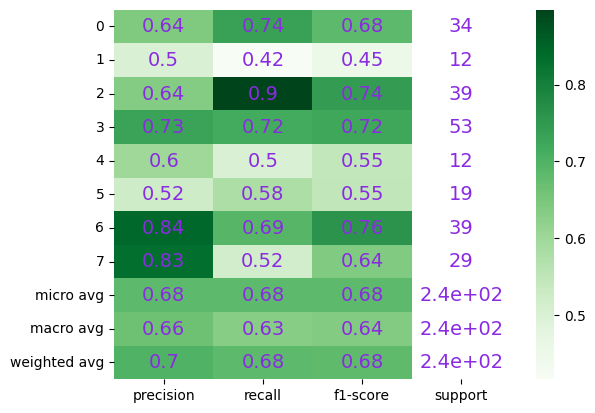

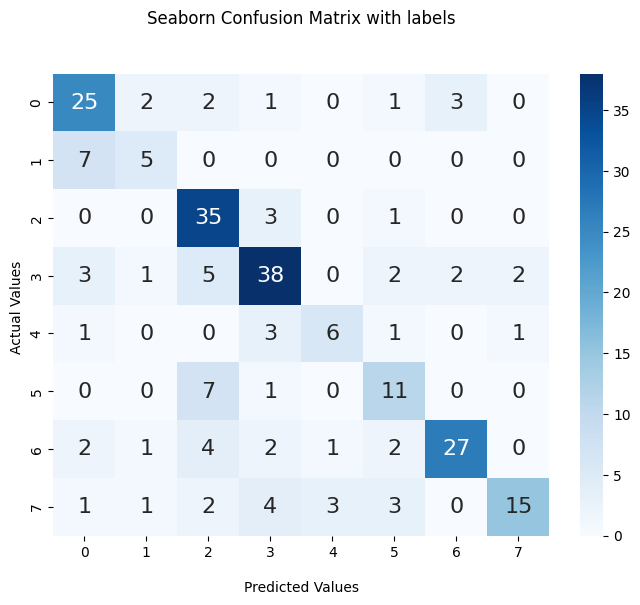

In [209]:
y_true_str = [str(_) for _ in df.y_true] + label_names
y_pred_str = [str(_) for _ in df.y_pred] + label_names

clf_report = classification_report(y_true_str,
                                   y_pred_str,
                                   labels=label_names,
                                   target_names=label_names,
                                   output_dict=True)

clf_report_df = pd.DataFrame(clf_report).iloc[:, :].T
clf_report_df["support"] = clf_report_df["support"].astype(int)

mask = np.zeros((11, 4))
mask[:,3] = True
sns.heatmap(clf_report_df, mask=mask, cmap="Greens")
sns.heatmap(clf_report_df, alpha=0, cbar=False, annot=True, annot_kws={"size": 14, "color":"blueviolet"})

plt.show()



cm = confusion_matrix(y_true_str, y_pred_str)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)

# Display the visualization of the Confusion Matrix.
plt.show()

In [210]:
df_2_3 = df.loc[df["y_true"] == "5"]
df_2_3 = df_2_3.loc[df_2_3["y_pred"] == "2"]
gpt_comments = df_2_3[["y_text", "content"]]
for i in range(len(gpt_comments)):
    x = gpt_comments.iloc[i]
    print(x.content)
    print()
    print(x.y_text)
    print("\n\n\n\n\n")

E ơi chiều ch nhận hàng rồi nhưng nước giặt đóng kiểu gì đổ hết của ch

Dựa trên yêu cầu của bạn, dưới đây là phân tích bình luận sau: "E ơi chiều ch nhận hàng rồi nhưng nước giặt đóng kiểu gì đổ hết của ch".
Đáp án: 2. Đặt câu hỏi hoặc đang thắc mắc.
Giải thích: Bình luận này cho thấy người viết đã nhận được đơn hàng chiều cùng ngày, nhưng họ đang thắc mắc về cách đóng gói của nước giặt. Họ tỏ ra tò mò hoặc có thắc mắc về cách sản phẩm được đóng gói hoặc cung cấp.






Đặt hàng bên e thấy đọc chốt rồi nt địa chỉ mà không thấy gửi hàng mấy lần rồi k phải 1 lần

Dựa trên yêu cầu của bạn, dưới đây là phân tích bình luận sau: "Đặt hàng bên e thấy đọc chốt rồi nt địa chỉ mà không thấy gửi hàng mấy lần rồi k phải 1 lần".
Đáp án: 2. Đặt câu hỏi hoặc đang thắc mắc.
Giải thích: Bình luận này cho thấy người viết đã đặt hàng từ cửa hàng nhưng đã nhận thấy rằng đã chốt đơn hàng và gửi địa chỉ thông qua tin nhắn, tuy nhiên, họ không nhận được hàng sau một số lần đã hỏi. Bì

/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30 manual/Elijah_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30 manual/Elijah_predict_0.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30 manual/Jack_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30 manual/Jack_predict_0.csv
(228, 5)


/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


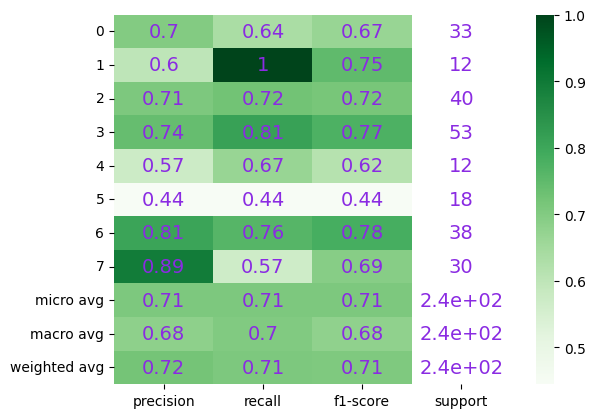

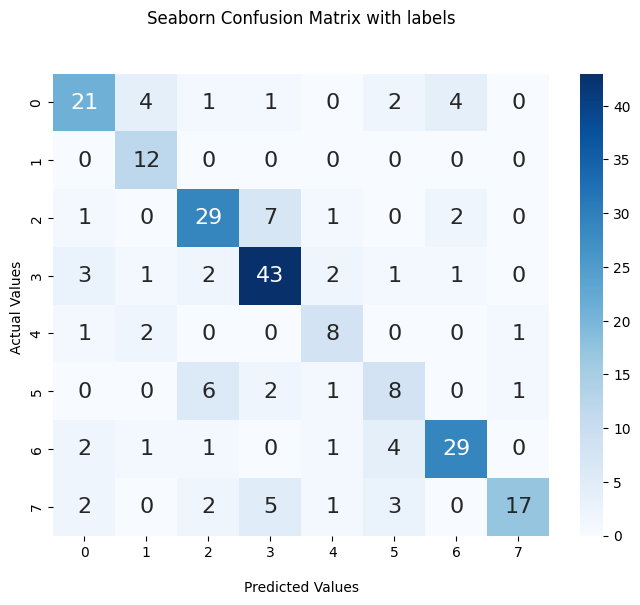

In [203]:
path_ = '/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt x30 manual'
onlyfiles = [os.path.join(path_, f) for f in os.listdir(path_) if 
os.path.isfile(os.path.join(path_, f))]
for file_path in onlyfiles:
    print(file_path)
df_manual = pd.DataFrame()
for file_path in onlyfiles:
    tmp_ = pd.read_csv(file_path, dtype=str, keep_default_na=False)
    df_manual = pd.concat([tmp_, df_manual], axis=0)
label_names = list(range(0, 7+1))

y_true = [_ for _ in df_copy.y_true]
df_manual["y_true"] = y_true

y_pred_manual = []
for i in range(len(df_manual)):
    text, pred = df_manual.iloc[i]["y_text"], df_manual.iloc[i]["y_pred"]
    if "Đáp án" in text:
        for _ in range(text.index("Đáp án"), len(text)):
            if text[_] in ["0", "1", "2", "3", "4", "5", "6", "7"]:
                pred = text[_]
                break
    y_pred_manual.append(pred)
df_manual["y_pred"] = y_pred_manual

df_manual = df_manual[df_manual["y_text"] != "Error occurred"]
selected_ind = []
for i in range(len(df_manual)):
    if "Đặt hàng Mã" not in df_manual.iloc[i]["content"]:
        if "Đặt Hàng Mã" not in df_manual.iloc[i]["content"]:
            if "Đặt hàng mã" not in df_manual.iloc[i]["content"]:
                if "Đặt Hàng mã" not in df_manual.iloc[i]["content"]:
                    selected_ind.append(i)
df_manual = df_manual.iloc[selected_ind]
print(df_manual.shape)

y_true_str = [str(_) for _ in df_manual.y_true] + label_names
y_pred_str = [str(_) for _ in df_manual.y_pred] + label_names

clf_report = classification_report(y_true_str,
                                   y_pred_str,
                                   labels=label_names,
                                   target_names=label_names,
                                   output_dict=True)

clf_report_df = pd.DataFrame(clf_report).iloc[:, :].T
clf_report_df["support"] = clf_report_df["support"].astype(int)

mask = np.zeros((11, 4))
mask[:,3] = True
sns.heatmap(clf_report_df, mask=mask, cmap="Greens")
sns.heatmap(clf_report_df, alpha=0, cbar=False, annot=True, annot_kws={"size": 14, "color":"blueviolet"})

plt.show()



cm = confusion_matrix(y_true_str, y_pred_str)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)

# Display the visualization of the Confusion Matrix.
plt.show()

In [204]:
x = df_manual.loc[df_manual["y_true"] == "2"]
x = x.loc[x["y_pred"] == "3"]
gpt_comments = x[["y_text", "content"]]
for i in range(len(gpt_comments)):
    x = gpt_comments.iloc[i]
    print(x.content)
    print()
    print(x.y_text)
    print("\n\n\n\n\n")

Chuẩn kem trộn cần thơ

Đáp án: 3.
Giải thích: Bình luận "Chuẩn kem trộn cần thơ" đề cập đến một sản phẩm kem trộn có tiêu chuẩn hoặc chất lượng tốt, được liên kết với địa điểm "Cần Thơ". Bình luận này không tag tên riêng hoặc chia sẻ bài, không đặt câu hỏi, không thể xác định việc chốt đơn hay thích sản phẩm. Tuy nhiên, nó có liên quan đến thông số và mô tả sản phẩm kem trộn. Vì vậy, bình luận này có thể được phân loại là "Chọn thông số cho sản phẩm" với đáp án là 3.






57kg mặc được không

Đáp án: 3.
Giải thích: Bình luận "57kg mặc được không" đang yêu cầu thông tin về khả năng mặc sản phẩm với cân nặng 57kg. Điều này liên quan đến việc chọn thông số cho sản phẩm, trong trường hợp này là khả năng vừa vặn với cân nặng của người viết bình luận.






Lên đầm liền không chị

Đáp án: 3.
Giải thích: Bình luận "Lên đầm liền không chị" đang yêu cầu chọn thông số cho sản phẩm, trong trường hợp này là đầm. Người viết bình luận muốn biết liệu sản phẩm có sẵn trong phiên bản đầm liền không, 

In [ ]:
y_manual = []
for i in range(len(df)):
    text = df.iloc[i]["content"]
    print(text)
    x = str(input())
    y_manual.append(x)